## Chapter 17

In this chapter, we do a brief introduction to quantum computation. Given time constraints, we try to build a bridge from more familiar representations of probability to those that get used in quantum computation. And then we spend a lot of time working out some examples of quantum operations by hand, in a way that does not presuppose prior famliarity with linear algebra. In this, we are largely just trying to present a more philosopher-friendly introduction of the kind one finds in {cite}`Arora2009-wz` Chapter 10 and {cite}`Nielsen2011-sp` Chapter 1. Outside of these presentational matters, nothing here is new above and beyond these sources. We close with a brief discussion of how quantum computation might prompt revisions of the Church-Turing thesis, and essentialy just give a reading of Section 1 of Deutsch's famous paper ({cite}`Deutsch1985-ic`).

## Probability

### Sample spaces of finite strings

Today we work with the sample space $\{0,1\}^n$, consisting of all finite binary strings of length $n$. Here are the simplest examples:

- $\{0,1\}^1 = \{0,1\}$, the two-element space space consisting just of a length-one string whose sole entry is 0, and a length-one string whose sole entry is 1.

- $\{0,1\}^2 = \{00,01,10,11\}$, the four element sample space consisting of four length-two binary strings.

- $\{0,1\}^3 = \{000, 001, 010, 011, 100, 101$, $110, 111\}$, the eight element sample space consisting of eight length-three binary strings.  

An alternative name for $\{0,1\}^n$ is $2^n$.

The elements of $\{0,1\}^n$ can be viewed as the length $n$ paths through the binary branching tree. Here is the a picture of it up to $n=3$.

![Tree](img/tree.png) 

### Representing probability measures on finite spaces

The usual approach, which we took earlier, is the following:

*Definition 1:* Given a sample space $\Omega$, a probability measure on it is a function $P:\{A: A\subseteq \Omega\}\rightarrow \mathbb{R}$ satisfying the following for all events $A,B\subseteq \Omega$:

- $P(A)\geq 0$ 
- $P(A\cup B)=P(A)+P(B)$ if $A\cap B=\emptyset$
- $P(\Omega)=1$

However, when $\Omega$ is finite and when you are in a situation where it is most convenient to think about singleton events, it is better to use the following definition:

*Definition 2:* Given a sample space $\Omega$, a probability measure on it is a function $p:\Omega\rightarrow \mathbb{R}$ satisfying the following:

- $\sum_{\omega\in \Omega} p(\omega)=1$
- $p(\omega)\geq 0$ for all $\omega$ in $\Omega$

It is not too hard to see that these definitions are equivalent, in the following sense:

- If one starts with $P$ as in Definition 1, one can construct $p(\omega)=P(\{\omega\})$ which will satisfy the conditions of Definition 2.
- If one starts with $p$ as in Definition 2, one can construct $P(A)=\sum_{\omega\in A} p(\omega)$ which satisfies the conditions of Definition 1.
- If one does one construction followed by the other, one gets back to where one started from.

### Examples

Here are three examples which are very natural in the setting of Definition 2.

*Example 1*: let $\Omega =\{0,1\}^2$ and let $p(00)=.15$, $p(01)=.20$, $p(10)=.60$, and $p(11)=.05$

*Example 2*: if $\Omega$ have $k$ elements, then $p(\omega)=\frac{1}{k}$ is the *uniform measure*.

*Example 3*: if $\omega_0$ is a specific element of $\Omega$, then the *Dirac measure* $\delta_{\omega_0}(\omega)=1$ if $\omega=\omega_0$, and $\delta_{\omega_0}(\omega)=0$ otherwise.

## Three ways of making probability and computation interact

Here are three basic ways, which are not exhaustive and not exclusive:

1. Relax "find program that does such-and-such on *all* inputs from $\{0,1\}^n$" to "find program that does such-and-such on 75% of inputs from $\{0,1\}^n$". This is what we were doing when we talked about machine learning; it is also natural in many other contexts.

2. Consider two Turing machine programs $M_0$ and $M_1$, and then at each step of the computation flip a coin to decide whether you are going to follow $M_0$ or $M_1$. This is one way of thinking about *randomized algorithms* ({cite}`Motwani1995-cm`)

3. Instead of computing on strings $\{0,1\}^n$, compute on probability measures $p:\{0,1\}^n\rightarrow \mathbb{R}$. 

We work with 1 and 3 today, and start out with 3.

## Visual representations of probability measures on $\{0,1\}$

For this section, we are working with $n=1$ so that $\{0,1\}^n=\{0,1\}$.

Here are many ways to visually represent probability measures on $\{0,1\}$. Which one you prefer depends a lot on the other math which one is using.

### Option 1: the line $y=1-x$

Since $p(0)+p(1)=1$, one has $p(1)=1-p(0)$. Hence, we can represent them as points on the blue line $y=1-x$. 

That is, the way to read the below diagram is that each point $(x,y)$ on the line $y=1-x$ represents a probability measure $p:\{0,1\}\rightarrow \mathbb{R}$ satisfying $p(0)=x$ and $p(1)=y$.

We have:

- The uniform measure is the dark blue dot. 
- The Dirac measure that puts all the weight on 0 is the green dot.
- The Dirac measure that puts all the weight on 1 is the red dot.   

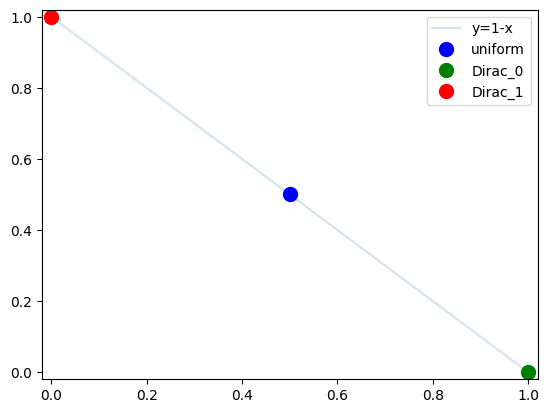

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of x values from 0 to 1
x = np.linspace(-.1, 1.1, 100)

# Calculate the corresponding y values
y = 1 - x

# Create the plot
plt.plot(x, y, label='y=1-x', alpha=0.2)


plt.plot(0.5, 0.5, 'bo', label = 'uniform', markersize=10)
plt.plot(1, 0, 'go', label = 'Dirac_0', markersize=10)
plt.plot(0, 1, 'ro', label = 'Dirac_1', markersize=10)

# Set the x and y axis limits
plt.xlim([-.02, 1.02])
plt.ylim([-.02, 1.02])

# Add a legend
plt.legend()

# Show the plot
plt.show()

Here's a different approach:

### Option 2: the circle $x^2+y^2=1$

We represent probability measures as functions $\psi: \{0,1\}\rightarrow \mathbb{R}$ satisfying $\psi(0)^2+\psi(1)^2=1$ by setting $p(0)=\psi(0)^2$ and $p(1)=\psi(1)^2$.

That is, the way to read the below diagram is that each point $(x,y)$ on the circle $x^2+y^2=1$ represents a probability measure $p:\{0,1\}\rightarrow \mathbb{R}$ satisfying $p(0)=x^2$ and $p(1)=y^2$.

This results in each probability measure being represented in a number of ways. We have in particular:

- The uniform measure is represented by any of the four blue dots. 
- The Dirac measure that puts all the weight on 0 is represented by either of the two green dots.
- The Dirac measure that puts all the weight on 1 is represented by either of the two red dots.

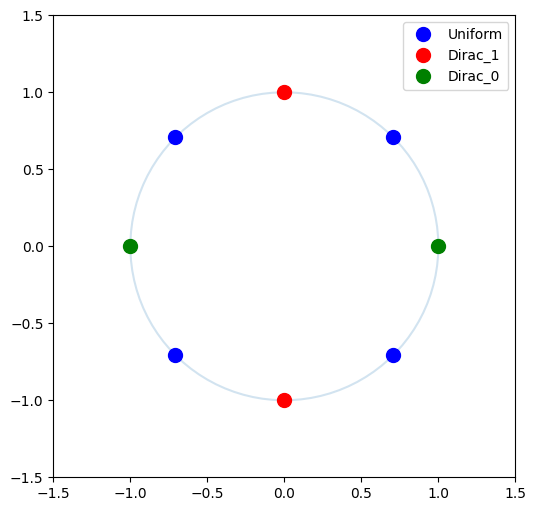

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of angles from 0 to 2*pi
theta = np.linspace(0, 2*np.pi, 100)

# Calculate the x and y coordinates of the points on the circle
x = np.cos(theta)
y = np.sin(theta)

# Create the plot
plt.figure(figsize=(6,6))
plt.plot(x, y, alpha=0.2)

# Add blue dots at the specified locations
plt.plot(1/np.sqrt(2), 1/np.sqrt(2), 'bo', markersize=10, label='Uniform')
plt.plot(1/np.sqrt(2), -1/np.sqrt(2), 'bo', markersize=10)
plt.plot(-1/np.sqrt(2), 1/np.sqrt(2), 'bo', markersize=10)
plt.plot(-1/np.sqrt(2), -1/np.sqrt(2), 'bo', markersize=10)


# Add green dots at the specified locations
plt.plot(0, 1, 'ro', markersize=10, label='Dirac_1')
plt.plot(1, 0, 'go', markersize=10, label='Dirac_0')
plt.plot(0, -1, 'ro', markersize=10)
plt.plot(-1, 0, 'go', markersize=10)

# Set the x and y axis limits
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

plt.legend( loc='upper right')

# Show the plot
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Option 3: the one-dimensional sphere $x^2+y^2\leq 1$

We represent probability measures as functions $\psi: \{0,1\}\rightarrow \mathbb{C}$ satisfying $\left|\psi(0)\right|^2+\left|\psi(1)\right|^2=1$ by setting $p(0)=\left|\psi(0)\right|^2$ and $p(1)=\left|\psi(1)\right|^2$.

Recall that if a complex number $\alpha = x+iy$  is given by its coordinates $(x,y)$ in the plane, then its absolute value is given by $\left|\alpha\right|=\left|(x,y)\right|=\sqrt{x^2+y^2}$, and hence $\left|\alpha\right|^2=\left|(x,y)\right|^2=x^2+y^2$. Note that $\left|\alpha\right|\leq 1$ iff $\left|\alpha\right|^2\leq 1$.

The way to read the below diagram is that each complex number $\alpha = x+iy$ with $\left|\alpha\right|\leq 1$  represents a probability measure $p:\{0,1\}\rightarrow \mathbb{R}$ satisfying $p(0)=\left|\alpha\right|^2$ and $p(1)=1-\left|\alpha\right|^2$. Note that only $\alpha$ satisfying $\left|\alpha\right|\leq 1$ is being represented in the diagram.

This results in most probability measures being represented in a continuum number of ways. We have in particular:

- The uniform measure is represented by the points $\alpha = x+iy$ with $x^2+y^2=\left|\alpha\right|^2=\frac{1}{2}$ and hence $\left|\alpha\right|=\frac{1}{\sqrt{2}}$, which are the points directly on the blue circle.
- The Dirac measure that puts all the weight on 1 is represented by the points $\alpha = x+iy$ with $x^2+y^2=\left|\alpha\right|^2=0$, which is just the origin, the green dot.
- The Dirac measure that puts all the weight on 0 is represented by the points $\alpha = x+iy$ with $x^2+y^2=\left|\alpha\right|^2=1$, which are the points directly on the red circle.

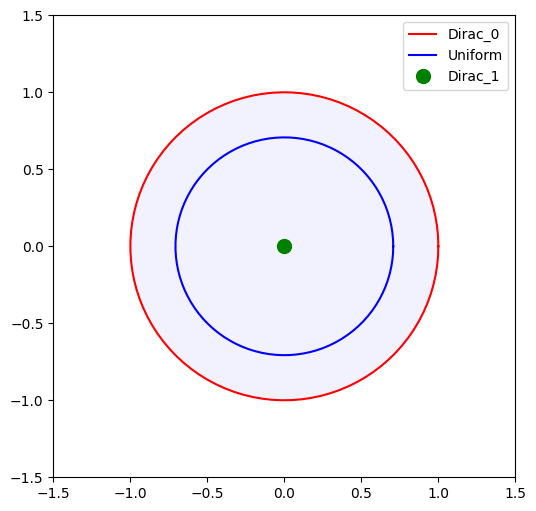

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of angles from 0 to 2*pi
theta = np.linspace(0, 2*np.pi, 100)

# Calculate the x and y coordinates of the points on the circle
x = np.cos(theta)
y = np.sin(theta)
x1 = (1/np.sqrt(2))*x
y1 = (1/np.sqrt(2))*y

# Create the plot
plt.figure(figsize=(6,6))
plt.plot(x, y, color = 'red', label = 'Dirac_0')
plt.plot(x1, y1, color = 'blue', label = 'Uniform')
plt.plot(0, 0, 'go', markersize=10, label='Dirac_1')

plt.fill(x, y, 'b', alpha=0.05)  # 'b' is for blue color and alpha is for transparency


# Set the x and y axis limits
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

plt.legend( loc='upper right')

# Show the plot
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

This last representation is the one we use today.

### Generalizing from $n=1$ to $n\geq 1$

It is hard to visualize the case of $n> 1$. But formally, we just represent probability measures on the sample space $\{0,1\}^n$ by functions $\psi:\{0,1\}^n\rightarrow \mathbb{C}$ satisfying

$$\sum_{\sigma\in \{0,1\}^n} \left|\psi(\sigma)\right|^2 = 1$$

The corresponding probability measure satisfies $p(\sigma) = \left|\psi(\sigma)\right|^2$.

## Notational conventions from quantum mechanics

### The case $n=1$

Instead of representing probability measures by functions $\psi:\{0,1\}\rightarrow \mathbb{C}$ satisfying $\left|\psi(0)\right|^2+\left|\psi(1)\right|^2=1$, we represent by an element $\psi$ of $\mathbb{C}^2$ satisfying 

- $\psi = \alpha\cdot |0\rangle +\beta\cdot |1\rangle$
- where $\alpha, \beta$ are complex numbers satisfying $\left|\alpha\right|^2+\left|\beta\right|^2=1$

This amounts the same thing as our functional representation $\psi:\{0,1\}\rightarrow \mathbb{C}$ because one can choose $|0\rangle$ and $|1\rangle$ to be points of $\mathbb{C}^2$ which are linearly independent over the complex field. There are many choices but the most simple one is to choose $|0\rangle=(1,0)$ and $|1\rangle=(0,1)$.

Under this representation, $\psi$ represents the probability measure $p:\{0,1\}\rightarrow \mathbb{R}^{\geq 0}$ satisfying $p(0)=\left|\alpha\right|^2$ and $p(1)=\left|\beta\right|^2$.

### The case $n=2$

Instead of representing probability measures by functions $\psi:\{00, 01,10,11\}\rightarrow \mathbb{C}$ satisfying $\left|\psi(00)\right|^2+\left|\psi(01)\right|^2+\left|\psi(10)\right|^2+\left|\psi(11)\right|^2=1$, we represent by elements $\psi$ of $\mathbb{C}^4$ satisfying 

- $\psi = \alpha\cdot |00\rangle +\beta\cdot |10\rangle+\gamma\cdot |01\rangle+\delta\cdot |11\rangle$
- where $\alpha, \beta, \gamma, \delta$ are complex numbers satisfying $\left|\alpha\right|^2+\left|\beta\right|^2+\left|\gamma\right|^2+\left|\delta\right|^2=1$

This amounts the same thing as the functional representation $\psi:\{00, 01,10,11\}\rightarrow \mathbb{C}$ because one can choose $|00\rangle, |01\rangle, |10\rangle, |11\rangle$ to be points of $\mathbb{C}^4$ which are linearly independent over the complex field. E.g. one can choose $|00\rangle=(1,0,0,0), |01\rangle=(0,1,0,0), |10\rangle=(0,0,1,0), |11\rangle=(0,0,0,1)$.

Under this representation, $\psi$ represents the probability measure $p:\{00,01,10,11\}\rightarrow \mathbb{R}^{\geq 0}$ satisfying $p(00)=\left|\alpha\right|^2$ and $p(01)=\left|\beta\right|^2$ and $p(10)=\left|\gamma\right|^2$ and $p(11)=\left|\delta\right|^2$.

### The general case $n\geq 1$

Instead of representing probability measures by functions $\psi:\{0,1\}^n\rightarrow \mathbb{C}$ satisfying $\sum_{\sigma\in \{0,1\}^n} \left|\psi(\sigma)\right|^2 = 1$, we represent by elements $\psi$ of $\mathbb{C}^{2^n}$ satisfying 

- $\psi = \sum_{\sigma\in \{0,1\}^n} \alpha_{\sigma}\cdot |\sigma\rangle$
- where $\alpha_{\sigma}$ are complex numbers satisfying $\sum_{\sigma\in \{0,1\}^n} \left|\alpha_{\sigma}\right|^2 = 1$

This amounts the same thing as the functional representation $\psi:\{0,1\}^n\rightarrow \mathbb{C}$ because one can choose $|\sigma\rangle$ to be points of $\mathbb{C}^{2^n}$ which are linearly independent over the complex field. There are various choices, but the simpliest is to order $\{0,1\}^n$ lexicographically from left to right and to set $|\sigma\rangle$ equal to the $2^n$-tuple of complex numbers which is zero on all entries except the $\sigma$-th, where it is one, and where the order of $\sigma$-th is dicated by the lexiographic ordering.

Under this representation, $\psi$ represents the probability measure $p:\{0,1\}^n\rightarrow \mathbb{R}^{\geq 0}$ satisfying $p(\sigma)=\left|\alpha_{\sigma}\right|^2$.

### Quantum mechanics vocabulary  

We are accustomed in more elementary contexts to thinking about the elements of $\{0,1\}^n$ as recording the possible outcomes of a single physical process, e.g. elements of $\{0,1\}^n$ represent the possible outcomes of flipping a single coin $n$-times.

In the quantum mechanics vocabulary:

For $n=1$, the element $\psi=\alpha\cdot |0\rangle +\beta\cdot |1\rangle$ as is referred to as a *superposition of a single qubit (quantum bit)*. 
- This single qubit is in state $0$ with probability $\left|\alpha\right|^2$
- This single qubit is in state $1$ with probability $\left|\beta\right|^2$.

For $n=2$, the element $\psi = \alpha\cdot |00\rangle +\beta\cdot |01\rangle+\gamma\cdot |10\rangle+\delta\cdot |11\rangle$ as above is referred to as a *superposition of two qubits*. 
- This pair of qubits is such that "the first is in state $0$ and the second is in state $0$" with probability  $\left|\alpha\right|^2$
- This pair of qubits is such that "the first is in state $0$ and the second is in state $1$" with probability  $\left|\beta\right|^2$
- This pair of qubits is such that "the first is in state $1$ and the second is in state $0$" with probability  $\left|\gamma\right|^2$
- This pair of qubits is such that "the first is in state $1$ and the second is in state $1$" with probability  $\left|\delta\right|^2$

In general, for $n\geq 1$, the element $\psi = \sum_{\sigma\in \{0,1\}^n} \alpha_{\sigma}\cdot |\sigma\rangle$ as above is referred to as a *superposition of $n$-qubits*. 
- This $n$-tuple of qubits is in state $\sigma$ with probability $\left|\alpha_{\sigma}\right|^2$.


## Quantum operations

### The norm

In $\mathbb{C}^M$, the norm is given by $\|(\alpha_1, \ldots, \alpha_M)\| = \sqrt{\left|\alpha_1\right|^2 +\cdots +\left|\alpha_M\right|^2}$. Note that if one wrote out each of the complex numbers $\alpha_j = u_j+i\cdot v_j$, then one would have $\|(\alpha_1, \ldots, \alpha_M)\| = \sqrt{u_1^2+v_1^2 +\cdots +u_n^2+v_n^2}$.

We assume that choices of $|0\rangle, |1\rangle, |00\rangle, |01\rangle, |10\rangle, |11\rangle$ are all such that they have norm one (this is true of the simple choices we made above).

Hence, superpositions of $n$-qubits are just elements of $\mathbb{C}^{2^n}$ with norm $1$.

### One-place operations

A one-place quantum operation is given by a map $F:\mathbb{C}^2\rightarrow \mathbb{C}^2$ which is

- *linear*: $F(\psi+\psi^{\prime}) = F(\psi)+F(\psi^{\prime})$ and $F(\alpha \cdot \psi)=\alpha \cdot F(\psi)$
- *preserves norm*: $\|F(\psi)\| = \|\psi\|$

We write these in terms of $\psi, \psi^{\prime}$ which range over all of $\mathbb{C}^2$, even though we are most interested in the case where they are superpositions of qubits. In the linearlity clause, $\alpha$ ranges over complex numbers.

The restriction to linearity is motivated by empirical considerations in quantum mechanics ({cite}`Nielsen2011-sp` p. 18). We want norm preservation since **our operations should map superpositions of qubits to superpositions of qubits**. One can check:

*Proposition* A linear map $F:\mathbb{C}^2\rightarrow \mathbb{C}^2$ perserves norm iff it sends superpositions of qubits to superpositions of qubits, i.e. if $\|\psi\|=1$ then $\|F(\psi)\|=1$.

*Proof*: The forward direction is obvious. For the backward direction, we may suppose that $\|\psi\|\neq 0$. Then let $\psi^{\prime}=\frac{1}{\|\psi\|}\cdot \psi$, so that $\|\psi^{\prime}\|=1$. Then by hypothesis $\|F(\psi^{\prime})\|=1$. But by linearity, we have $1=\|F(\psi^{\prime})\| =\frac{1}{\|\psi\|} \cdot \|F(\psi)\|$ and hence  $\|F(\psi)\| = \|\psi\|$.

### Examples of one-place operations

Here are some examples of one-place quantum operations on $\psi =\alpha\cdot |0\rangle +\beta\cdot |1\rangle$ 

- *Quantum not*: $X(\psi) = \beta\cdot |0\rangle +\alpha\cdot |1\rangle$

- *$Z$-gate*:  $Z(\psi) = \alpha\cdot |0\rangle -\beta\cdot |1\rangle$

- *Hadamard gate*: $H(\psi) = \frac{\alpha+\beta}{\sqrt{2}}  |0\rangle + \frac{\alpha-\beta}{\sqrt{2}}  |1\rangle =  \alpha\cdot \frac{|0\rangle+|1\rangle}{\sqrt{2}}   + \beta \cdot \frac{|0\rangle-|1\rangle}{\sqrt{2}}$

### Hadamard gate maps a Dirac to a uniform

Suppose that $\psi =\alpha\cdot |0\rangle +\beta\cdot |1\rangle$ represents a Dirac measure with all the weight on zero, so that $\left|\alpha\right|^2 =1$ and $\beta =0$. 

Then $H(\psi) = \frac{\alpha}{\sqrt{2}}  |0\rangle + \frac{\alpha}{\sqrt{2}}  |1\rangle$.

Since $\left|\frac{\alpha}{\sqrt{2}}\right|^2 = \frac{\left|\alpha\right|^2}{2} = \frac{1}{2}$, one has that $H(\psi)$ represents the uniform measure. 

Hence: some quantum operations map representations of Dirac measures to represenations of uniform measures.

### Two-place operations

A two-place quantum operation is given by a map $F:\mathbb{C}^4\rightarrow \mathbb{C}^4$ which is

- *linear*: $F(\psi+\psi^{\prime}) = F(\psi)+F(\psi^{\prime})$ and $F(\alpha \cdot \psi)=\alpha \cdot F(\psi)$
- *preserves norm*: $\|F(\psi)\| = \|\psi\|$

### Examples

Here are some examples of two-place quantum operations on $\psi = \alpha\cdot |00\rangle +\beta\cdot |01\rangle+\gamma\cdot |10\rangle+\delta\cdot |11\rangle$, where we use the color blue to highlight what has been swapped:

*Controlled not*: $CN(\psi) = \alpha\cdot |00\rangle +\beta\cdot |01\rangle+\textcolor{blue}{\delta}\cdot |10\rangle+\textcolor{blue}{\gamma}\cdot |11\rangle$.

*Alternative controlled not*: $AltCN(\psi) = \alpha\cdot |00\rangle +\textcolor{blue}{\delta}\cdot |01\rangle+\gamma\cdot |10\rangle+\textcolor{blue}{\beta}\cdot |11\rangle$.

Since these are given by permutations of the coefficients on the basis elements, it is easy to see that they are linear and norm preserving. 

### Truth table rendition of controlled not

One can describe controlled not in a truth-table like way as follows. It is the function which sends $|j,k\rangle$ to $|j,k\oplus j\rangle$, where $j\oplus k$ is exlusive or (or alternatively is addition mod 2):

| $j$ | $k$ | $k\oplus j$ | $j,k\oplus j$ |
|----------|----------|----------|----------|
| 0   | 0   | 0   | 00   |
| 0   | 1   | 1   | 01   |
| 1   | 0  | 1  | 11  |
| 1  | 1  | 0  | 10  |

Written out in terms of truth-tables it would be the following, where we switch to the variables more familiar from truth-tables and where we switch 0 to false and 1 to true:

| $p$ | $q$ | $q\oplus p$ | $p,q\oplus p$ |
|----------|----------|----------|----------|
| F   | F   | F   | FF  |
| F   | T   | T   | FT   |
| T   | F  | T  | TT  |
| T  | T  | F  | TF  |

### Truth table rendition of alt controlled not

One can describe alt controlled not in a truth-table like way as follows. It is the function which sends $|j,k\rangle$ to $|j\oplus k, \rangle$, where $j\oplus k$ is exlusive or (or alternatively is addition mod 2):

| $j$ | $k$ | $j\oplus k$ | $j\oplus k,k$ |
|----------|----------|----------|----------|
| 0   | 0   | 0   | 00  |
| 0   | 1   | 1   | 11   |
| 1   | 0  | 1  | 10  |
| 1  | 1  | 0  | 01  |

Written out in terms of truth-tables it would be the following, where we switch to the variables more familiar from truth-tables and where we switch 0 to false and 1 to true:

| $p$ | $q$ | $p\oplus q$ | $p,p\oplus q$ |
|----------|----------|----------|----------|
| F   | F   | F   | FF  |
| F   | T   | T   | TT   |
| T   | F  | T  | TF  |
| T  | T  | F  | FT |



## Compositions of quantum operations

Any notion of computable function is closed under compositions, and it is easy to see that quantum operations as defined above are closed under compositions. 

Here are some simple examples:

### Bell states

These arise by applying Hadmard to the first component and then doing controlled not (whose application is in blue):

- $|00\rangle \mapsto \frac{|00\rangle +|\textcolor{blue}{10}\rangle}{\sqrt{2}}\mapsto \frac{|00\rangle +|\textcolor{blue}{11}\rangle}{\sqrt{2}}$

- $|01\rangle \mapsto \frac{|01\rangle +|\textcolor{blue}{11}\rangle}{\sqrt{2}}\mapsto \frac{|01\rangle +|\textcolor{blue}{10}\rangle}{\sqrt{2}}$

- $|10\rangle \mapsto \frac{|00\rangle -|\textcolor{blue}{10}\rangle}{\sqrt{2}}\mapsto \frac{|00\rangle -|\textcolor{blue}{11}\rangle}{\sqrt{2}}$

- $|11\rangle \mapsto \frac{|01\rangle -|\textcolor{blue}{11}\rangle}{\sqrt{2}}\mapsto \frac{|01\rangle -|\textcolor{blue}{10}\rangle}{\sqrt{2}}$

### Swap two qubits

Suppose $\psi = \alpha\cdot |00\rangle +\beta\cdot |01\rangle+\gamma\cdot |10\rangle+\delta\cdot |11\rangle$.

Define $SWAP(\psi) = \alpha\cdot |00\rangle +\textcolor{blue}{\gamma}\cdot |01\rangle+\textcolor{blue}{\beta}\cdot |10\rangle+\delta\cdot |11\rangle$.

Defined this way it is easy to see that it is a quantum operation. 

But one can also define it by $|00\rangle\mapsto |00\rangle$, $|01\rangle \mapsto |10\rangle$, $|10\rangle \mapsto |01\rangle$, and $|11\rangle \mapsto |11\rangle$. And in general $|i,j\rangle \mapsto |j,i\rangle$, hence the name *swap*.

One can then check that swap is a quantum operation by showing that it is the result of doing controlled not, followed by alt controlled not, followed by controlled not.

## Quantum computation 

We have not formally defined quantum computation. 

At first approximation, the idea is to say that $f:\{0,1\}^n\rightarrow \{0,1\}$ is computable if there is a quantum operation $F:\mathbb{C}^n\rightarrow \mathbb{C}^n$ such that for all $\sigma$ in $\{0,1\}^n$ with $F(|\sigma \rangle) = \sum_{\tau\in \{0,1\}^n} \alpha_{\tau}\cdot |\tau\rangle$ one has $\left|\alpha_{f(\sigma)^n}\right|\geq \frac{2}{3}$.

Hence, the idea is to think of the comptuation as follows:

- $f(\sigma)=0$ iff when one applies the quantum operation $F$ to $|\sigma\rangle$, one gets a representation of a probability measure which thinks that $0^n$ has probability $\geq \frac{2}{3}$, where $O^n$ is the length $n$ binary string whose entries are all zero.
- $f(\sigma)=1$ iff when one applies the quantum operation $F$ to $|\sigma\rangle$, one gets a representation of a probability measure which thinks that $1^n$ has probability $\geq \frac{2}{3}$, where $1^n$ is the length $n$ binary string whose entries are all one.

(There is nothing specific about $\frac{2}{3}$ that makes this work out: you could choose any number between $\frac{1}{2}$ and $1$).

Since this only applies to length $n$ strings, one makes it apply uniformly to all strings by requiring for each $n$ a quantum operation $F_n$ which acts appropriately *vis-à-vis* $f$ restricted to length $n$ strings. And since there are uncountably many quantum operations one wants to restrict to some countable class. One natural option is to close the basic examples like the examples up above under composition.

For more details, see {cite}`Arora2009-wz` p. 213.

## Revisions of the Church-Turing Thesis 

### 

If one builds feasibility constraints in the above characterization of quantum computation, one gets complexity classes such as ${\bf BQP}$, which is inbetween ${\bf P}$ and ${\bf EXPTIME}$ and which may, for all we know, be orthogonal to ${\bf NP}$.

In the event that some future separation is achieved, this then might suggest revisions of the Church-Turing thesis. In particular, suppose that it turned out that ${\bf P}\subsetneq {\bf BQP}$. One might then have two rival versions of feasible computation, ${\bf P}$ and ${\bf BQP}$, and hence two different version of the feasible Church-Turing thesis.

Which of these would be right and what reasons would be relevant to this decision? Some part of it no doubt would involve whether it is okay to get things right just most of the time. And another part of it would involve whether the distinctive quantum apparatus was available to you.

One of the founders of quantum computation, Deutsch, thought that thinking through this would require a rethinking of the content of the Church-Turing thesis itself. 

### Deutsch and the physical Church-Turing Thesis

Here is Deutsch's physical Church-Turing thesis:

> Every finitely realizable physical system can be perfectly simulated by a universal model computing machine operating by finite means ({cite}`Deutsch1985-ic` pp. 97, 99).

His notion of 'by finite means' refers to Turing-Gandy-Sieg's boundedness and locality conditions ({cite}`Deutsch1985-ic` p. 100), which on his view are compatible with certain forms of indeterminacy. 

Imagine, as above, that it comes to pass that ${\bf P}\subsetneq {\bf BQP}$. Further, imagine that this is not just a mathematical possibility, but that the relevant computation is physically realized, in a quantum manner: that is, imagine that the quantum physicists and the computer scientists succeed in using the best parts of their knowledge and science to build a device which implements it in a natural way. Deutsch's thought is that our acceptance of the physical Church-Turing thesis would require us to revise our concept or model of computation from the feasible Turing model to a feasible quantum model. On this way of thinking about it, the physical Church-Turing thesis comes first, and then we apply it in light of advances in the relevant domains of physics. 

But why accept the physical Church-Turing thesis, as a constraint on our concept of computation? Deutsch's view is that it has the same status as a law of physics, which is an empirical law even if it is only indirectly testable. It will feature further as part of our best explanations of the relevant physical phenomena. To wit:

> The reason why we are confident that the machines we call calculators do indeed compute the arithmetic functions they claim to compute is not that we can 'check' their answers, for this is ultimately a futile process of comparing one machine with another: *Quis custodiet custodios ipos*? [*Who watches the watchers?*] The real reason is that we believe the detailed physical theory that was used in their design. That theory, including its assertion that the abstract functions of arithmetic are realized in Nature, is empirical ({cite}`Deutsch1985-ic` pp. 101-102).

Hence, on this way of thinking, we are wondering what the best explanation is of the observed phenomena that a constructed physical system (e.g. a calculator) is performing its task correctly. That explanation goes through the physical Church-Turing thesis which says that this can be simulated by a certain kind of formal model, presumably along with some verification proof using the formal model. If this happens enough times across a wide swath of experience, we would then take this to be part of a cumulative evidence for the physical Church-Turing thesis. Of course, the suasiveness of inference to the best explanation is a large topic in philosophy of science, where the key question is usually "why should the lovelist explanation be the likeliest?" (cf. {cite}`Lipton2004-lk` pp. 59-60). But bracketing that question, one can see then why a physical realization of ${\bf P}\subsetneq {\bf BQP}$ would, by Deutsch's lights, prompt a revision of the notion of computation: if we did not revise, we would not have an explanation of the physical systems in question. And noting this makes clear the sense in which the physical Church-Turing Thesis is a constraint on our notion of computation: it is a constraint to the extent that we are using it as part of our explanation of why physical systems are doing what we say that they are doing. 